## **On-Chain Analysis: Blocks + Transactions Per Day**

Let's learn Pandas through analyzing the Bitcoin Blockchain. There are many ways to do analysis but we are going to take the long, detailed route and hopefully learn along the way.

In this tutorial we are going to query the Bitcoin Blockchain and analyze the number of blocks and transactions that happened on a given day.

First let's import our libraries. `Pandas` to analyze data, `requests` to make a call to the API, `time` to slow down our API calls.

In [ ]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

Great, now the first thing we want to do is make a list of dates that we can iterate through. The API we are using comes from [BTC.com](https://btc.com/btc/adapter?type=api-doc).

This specific API takes a list of dates in YYYYMMDD format and outputs the blocks that happened on that day. Let's first create our dates.

We will use Pandas' `date_range` function to do this. We'll need to convert the format into a string as well.

In [ ]:
# First create our date range
date_range = pd.date_range(start='1/1/2018', end='2/01/2018')
date_range

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Then convert those dates into the proper string format using list comprehension
date_range_ft = [d.strftime('%Y%m%d') for d in date_range]
date_range_ft[:10]

['20180101',
 '20180102',
 '20180103',
 '20180104',
 '20180105',
 '20180106',
 '20180107',
 '20180108',
 '20180109',
 '20180110']

Great! Now that we have our list of dates, we want to create a loop that will run through our list and make and API call. We'll need to store the data in a list.

In [ ]:
# Start off by making a blank list
blocks_list = []

# Then iterate through your dates
for i, date in enumerate(date_range_ft):
  url = "https://chain.api.btc.com/v3/block/date/{}".format(date)
  r = requests.get(url)

  # Extract your response as json
  response_block_output = r.json()

  # Pull the list of blocks from the data field and append them to your list
  blocks_list.extend(response_block_output['data'])

  # Sleep for a bit to not go too quick
  time.sleep(10)

  # Print how far along you've gone
  if i % 5 == 0:
    print ("Finished Day #{}".format(i))

Finished Day #0
Finished Day #5
Finished Day #10
Finished Day #15
Finished Day #20
Finished Day #25
Finished Day #30


In [ ]:
r.status_code

200

Let's look at one of the responses as a sample. Look at all of the cool data there is.

In [ ]:
blocks_list[0]

{'bits': 402690497,
 'confirmations': 205927,
 'curr_max_timestamp': 1514850785,
 'difficulty': 1931136454487,
 'difficulty_double': 1931136454487.7163,
 'extras': {'pool_link': 'https://www.antpool.com/', 'pool_name': 'AntPool'},
 'hash': '0000000000000000006d5a64da890b8d67f9ed254705081bb280432a44a13d2b',
 'height': 502116,
 'is_orphan': False,
 'is_sw_block': True,
 'mrkl_root': '3b79a9ef9ce04d291fcb1606ec11918d23416a508904452f486a0d93279d48eb',
 'next_block_hash': '000000000000000000027b5f452555405e574bc206a4c6ef9bef63cc153c7ea3',
 'nonce': 3369788197,
 'pool_difficulty': 2573961887277,
 'prev_block_hash': '0000000000000000004c46d70c98c13a42721fc52b3fbef5c4f6342bb9fe3000',
 'reward_block': 1250000000,
 'reward_fees': 515447403,
 'sigops': 24454,
 'size': 1050311,
 'stripped_size': 980937,
 'timestamp': 1514850785,
 'tx_count': 2598,
 'version': 536870912,
 'weight': 3993122}

We only want a few fields from our json file, so I'm going to extract those to make our dataframe more clean. I want

* **Timestamp**: When the block was mined
* **Height**: Unique identifier of the block
* **tx_count**: How many transactions were in that block

In [ ]:
len(blocks_list)

5215

In [ ]:
blocks_list_small = [[x['timestamp'], x['height'], x['tx_count']] for x in blocks_list]
blocks_list_small[:5]

[[1514850785, 502116, 2598],
 [1514849945, 502115, 2375],
 [1514848457, 502114, 2719],
 [1514847391, 502113, 1971],
 [1514846766, 502112, 1062]]

Next let's convert this into a data frame. We are going to use the order of the items in the list to know which columns to tell pandas

In [ ]:
df = pd.DataFrame(blocks_list_small, columns=['timestamp', 'height', 'tx_count'])
df

,timestamp,height,tx_count
0,1514850785,502116,2598
1,1514849945,502115,2375
2,1514848457,502114,2719
3,1514847391,502113,1971
4,1514846766,502112,1062
...,...,...,...
5210,1517446403,507020,1744
5211,1517445750,507019,2530
5212,1517445549,507018,2147
5213,1517445364,507017,2803


Nice! Now we have data about blocks in our dataframe.

First thing is first. Let's clean up those dates. I want to replace the epoc seconds with the date.

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%D')
df

,timestamp,height,tx_count
0,01/01/18,502116,2598
1,01/01/18,502115,2375
2,01/01/18,502114,2719
3,01/01/18,502113,1971
4,01/01/18,502112,1062
...,...,...,...
5210,02/01/18,507020,1744
5211,02/01/18,507019,2530
5212,02/01/18,507018,2147
5213,02/01/18,507017,2803


Now finally for the good stuff! Lets find out how many blocks and transactions happened per day.

To do this we will use [pandas group by](https://www.dataindependent.com/pandas/pandas-group-by/) (the long way) to pull out the **distinct count** of heights and the summation of tx_count.

In [ ]:
df_grouped = df.groupby('timestamp').agg(
  num_blocks=pd.NamedAgg(column='height', aggfunc=pd.Series.nunique),
  num_transactions=pd.NamedAgg(column='tx_count', aggfunc=pd.Series.sum)
)
df_grouped.head(5)

,num_blocks,num_transactions
timestamp,,
01/01/18,156,241757
01/02/18,171,340980
01/03/18,157,395963
01/04/18,168,425008
01/05/18,143,342707


Woah cool! Now we can see how many blocks happened on a specific day and how many transactions those blocks had. Finally. Let's plot this out to view our data.

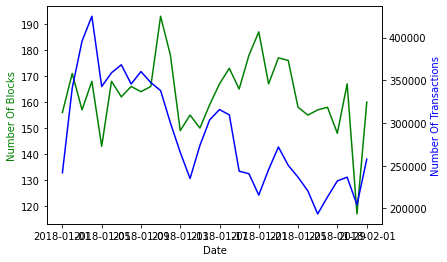

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(pd.to_datetime(df_grouped.index), df_grouped['num_blocks'], 'g-')
ax2.plot(pd.to_datetime(df_grouped.index), df_grouped['num_transactions'], 'b-')

ax1.set_xlabel('Date')

ax1.set_ylabel('Number Of Blocks', color='g')
ax2.set_ylabel('Number Of Transactions', color='b')

plt.plot()

# ax1.set_xticklabels(labels=[d.strftime('%Y-%m-%d') for d in date_range], rotation=45)

plt.show()